<a href="https://colab.research.google.com/github/gentomacine/Wrexham_university_dissertation/blob/main/COPD_DESSERTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
patients = pd.read_csv('/content/DimPatient.csv')
diseases = pd.read_csv('/content/DimDisease.csv')
encounters = pd.read_csv('/content/FactEncounter.csv')

print("Datasets loaded successfully:")
print(f"patients shape: {patients.shape}")
print(f"diseases shape: {diseases.shape}")
print(f"encounters shape: {encounters.shape}")

Datasets loaded successfully:
patients shape: (147852, 10)
diseases shape: (301, 5)
encounters shape: (147852, 16)


In [ ]:
display(patients.describe())

,Height,Weight
count,147852.000000,147852.00000
mean,159.884912,71.01609
std,19.126693,24.38055
min,50.000000,3.00000
25%,154.000000,57.00000
50%,163.000000,70.00000
75%,171.000000,84.00000
max,200.000000,219.00000


In [ ]:
display(encounters.describe())

,Encounter_ID,Disease_ID,ResponsibleDoctorID,InsuranceKey,RoomKey,CheckinDateKey,CheckoutDateKey,Patient_Severity_Score,RadiologyProcedureCount,EndoscopyProcedureCount
count,147852.000000,147852.000000,147852.000000,147852.000000,147852.000000,1.478520e+05,1.478520e+05,147852.000000,147852.000000,147852.000000
mean,76081.500000,1580.916849,862.629001,82.797595,204.167012,2.024067e+07,2.024078e+07,67.635682,0.253909,0.041041
std,42681.340337,102.210687,30.892202,0.870740,1.085490,3.445563e+02,3.330309e+02,20.282470,0.435248,0.198386
min,2156.000000,1413.000000,813.000000,82.000000,203.000000,2.024010e+07,2.024011e+07,0.000000,0.000000,0.000000
25%,39118.750000,1480.000000,835.000000,82.000000,203.000000,2.024040e+07,2.024051e+07,54.200000,0.000000,0.000000
50%,76081.500000,1601.000000,859.000000,82.000000,204.000000,2.024070e+07,2.024081e+07,71.300000,0.000000,0.000000
75%,113044.250000,1684.000000,889.000000,84.000000,205.000000,2.024093e+07,2.024111e+07,82.700000,1.000000,0.000000
max,150007.000000,1713.000000,922.000000,84.000000,208.000000,2.024123e+07,2.024123e+07,100.000000,1.000000,1.000000


In [ ]:
display(diseases.describe())

,Disease_ID,Disease Severity
count,301.000000,301.000000
mean,1563.000000,58.671096
std,87.035433,19.634700
min,1413.000000,15.000000
25%,1488.000000,45.000000
50%,1563.000000,60.000000
75%,1638.000000,74.000000
max,1713.000000,97.000000


In [32]:
# Ensure 'CheckinDateKey' and 'CheckoutDateKey' are converted to datetime objects
# Assuming the keys are in YYYYMMDD integer format, e.g., 20230101.
# 'errors='coerce'' will turn unparseable dates into NaT.
encounters['CheckInDate_Actual'] = pd.to_datetime(encounters['CheckinDateKey'], format='%Y%m%d', errors='coerce')
encounters['CheckOutDate_Actual'] = pd.to_datetime(encounters['CheckoutDateKey'], format='%Y%m%d', errors='coerce')

# Calculate Length of Stay (LOS) in days using the newly created actual date columns
encounters['LOS'] = (encounters['CheckOutDate_Actual'] - encounters['CheckInDate_Actual']).dt.days

print("Length of Stay (LOS) calculated successfully in 'encounters' DataFrame.")
print("First 5 rows of encounters with LOS:")
display(encounters.head())

Length of Stay (LOS) calculated successfully in 'encounters' DataFrame.
First 5 rows of encounters with LOS:


,Encounter_ID,Patient_ID,Disease_ID,ResponsibleDoctorID,InsuranceKey,RoomKey,CheckinDate,CheckoutDate,CheckinDateKey,CheckoutDateKey,Patient_Severity_Score,RadiologyType,RadiologyProcedureCount,EndoscopyType,EndoscopyProcedureCount,CompanionPresent,CheckInDate_Actual,CheckOutDate_Actual,LOS
0,2156,TR477,1661,896,82,203,2024-03-23 16:52:00,2024-04-28 19:29:00,20240323,20240428,56.2,NaN,0,NaN,0,True,2024-03-23,2024-04-28,36
1,2157,TR478,1635,911,83,203,2024-09-14 20:11:00,2024-10-20 12:57:00,20240914,20241020,46.3,NaN,0,NaN,0,True,2024-09-14,2024-10-20,36
2,2158,TR479,1632,905,82,203,2024-01-23 11:09:00,2024-03-29 17:00:00,20240123,20240329,63.2,NaN,0,NaN,0,True,2024-01-23,2024-03-29,66
3,2159,TR480,1452,843,82,204,2024-08-09 13:36:00,2024-09-13 21:46:00,20240809,20240913,74.9,CT Scan,1,NaN,0,True,2024-08-09,2024-09-13,35
4,2160,TR481,1441,836,82,205,2024-11-15 13:00:00,2024-11-30 15:53:00,20241115,20241130,100.0,NaN,0,Capsule Endoscopy,1,True,2024-11-15,2024-11-30,15


In [33]:
# Merge encounters with patients on Patient_ID
merged_data = pd.merge(encounters, patients, on='Patient_ID', how='left')

# Merge the result with diseases on Disease_ID
unified_dataset = pd.merge(merged_data, diseases, on='Disease_ID', how='left')

print("Unified analytical dataset created successfully.")
print(f"Unified dataset shape: {unified_dataset.shape}")
print("First 5 rows of the unified dataset:")
display(unified_dataset.head())

Unified analytical dataset created successfully.
Unified dataset shape: (147852, 32)
First 5 rows of the unified dataset:


,Encounter_ID,Patient_ID,Disease_ID,ResponsibleDoctorID,InsuranceKey,RoomKey,CheckinDate,CheckoutDate,CheckinDateKey,CheckoutDateKey,...,Birth Date,Height,Weight,Marital Status,Nationality,Blood Type,Admission Diagnosis,Disease Type,Disease Severity,Medical Unit
0,2156,TR477,1661,896,82,203,2024-03-23 16:52:00,2024-04-28 19:29:00,20240323,20240428,...,2023-02-05,77,10,Single,Brazilian,O-,Tonsillitis,ENT Diseases,43,Otorhinolaryngology
1,2157,TR478,1635,911,83,203,2024-09-14 20:11:00,2024-10-20 12:57:00,20240914,20241020,...,1981-09-19,182,94,Single,Irish,B-,Tooth Decay,Dental Health,20,Dentistry
2,2158,TR479,1632,905,82,203,2024-01-23 11:09:00,2024-03-29 17:00:00,20240123,20240329,...,1944-06-01,178,107,Single,Swiss,B+,Acute Myeloid Leukemia,Oncology,87,Oncology
3,2159,TR480,1452,843,82,204,2024-08-09 13:36:00,2024-09-13 21:46:00,20240809,20240913,...,1988-01-13,180,89,Single,Ukrainian,AB+,Kidney Stones,Internal Medicine,46,Nephrology
4,2160,TR481,1441,836,82,205,2024-11-15 13:00:00,2024-11-30 15:53:00,20241115,20241130,...,1998-04-22,184,63,Divorced,Australian,O+,Crohn's Disease,Internal Medicine,75,Gastroenterology


In [35]:


# Ensure 'Birth Date' is in datetime format
# Assuming 'Birth Date' column exists in unified_dataset after merging patients data
if 'Birth Date' in unified_dataset.columns:
    unified_dataset['Birth Date'] = pd.to_datetime(unified_dataset['Birth Date'])
    # Calculate age based on the current year
    current_year = pd.to_datetime('now').year
    unified_dataset['Age'] = current_year - unified_dataset['Birth Date'].dt.year
    print("Age column added to unified_dataset successfully.")
    print("First 5 rows of the unified dataset with Age:")
    display(unified_dataset.head())
else:
    print("Error: 'Birth Date' column not found in unified_dataset. Please ensure the patient data was merged correctly.")

Age column added to unified_dataset successfully.
First 5 rows of the unified dataset with Age:


,Encounter_ID,Patient_ID,Disease_ID,ResponsibleDoctorID,InsuranceKey,RoomKey,CheckinDate,CheckoutDate,CheckinDateKey,CheckoutDateKey,...,Height,Weight,Marital Status,Nationality,Blood Type,Admission Diagnosis,Disease Type,Disease Severity,Medical Unit,Age
0,2156,TR477,1661,896,82,203,2024-03-23 16:52:00,2024-04-28 19:29:00,20240323,20240428,...,77,10,Single,Brazilian,O-,Tonsillitis,ENT Diseases,43,Otorhinolaryngology,3
1,2157,TR478,1635,911,83,203,2024-09-14 20:11:00,2024-10-20 12:57:00,20240914,20241020,...,182,94,Single,Irish,B-,Tooth Decay,Dental Health,20,Dentistry,45
2,2158,TR479,1632,905,82,203,2024-01-23 11:09:00,2024-03-29 17:00:00,20240123,20240329,...,178,107,Single,Swiss,B+,Acute Myeloid Leukemia,Oncology,87,Oncology,82
3,2159,TR480,1452,843,82,204,2024-08-09 13:36:00,2024-09-13 21:46:00,20240809,20240913,...,180,89,Single,Ukrainian,AB+,Kidney Stones,Internal Medicine,46,Nephrology,38
4,2160,TR481,1441,836,82,205,2024-11-15 13:00:00,2024-11-30 15:53:00,20241115,20241130,...,184,63,Divorced,Australian,O+,Crohn's Disease,Internal Medicine,75,Gastroenterology,28


In [36]:
unified_dataset['COPD_Flag'] = unified_dataset['Admission Diagnosis'].str.contains('COPD', na=False, case=False).astype(int)

print("COPD_Flag column created successfully.")
print("Value counts for COPD_Flag:")
display(unified_dataset['COPD_Flag'].value_counts())

COPD_Flag column created successfully.
Value counts for COPD_Flag:


,count
COPD_Flag,
0,146299
1,1553


In [37]:
drop_cols = [
    'Encounter_ID', 'Patient_ID', 'First Name', 'Last Name',
    'ResponsibleDoctorID', 'InsuranceKey', 'RoomKey',
    'Admission Diagnosis', 'Disease_ID', 'Nationality'
]

unified_dataset = unified_dataset.drop(columns=drop_cols, errors='ignore')

print("Irrelevant columns dropped successfully.")
print(f"New unified dataset shape: {unified_dataset.shape}")
print("First 5 rows of the modified unified dataset:")
display(unified_dataset.head())

Irrelevant columns dropped successfully.
New unified dataset shape: (147852, 24)
First 5 rows of the modified unified dataset:


,CheckinDate,CheckoutDate,CheckinDateKey,CheckoutDateKey,Patient_Severity_Score,RadiologyType,RadiologyProcedureCount,EndoscopyType,EndoscopyProcedureCount,CompanionPresent,...,Birth Date,Height,Weight,Marital Status,Blood Type,Disease Type,Disease Severity,Medical Unit,Age,COPD_Flag
0,2024-03-23 16:52:00,2024-04-28 19:29:00,20240323,20240428,56.2,NaN,0,NaN,0,True,...,2023-02-05,77,10,Single,O-,ENT Diseases,43,Otorhinolaryngology,3,0
1,2024-09-14 20:11:00,2024-10-20 12:57:00,20240914,20241020,46.3,NaN,0,NaN,0,True,...,1981-09-19,182,94,Single,B-,Dental Health,20,Dentistry,45,0
2,2024-01-23 11:09:00,2024-03-29 17:00:00,20240123,20240329,63.2,NaN,0,NaN,0,True,...,1944-06-01,178,107,Single,B+,Oncology,87,Oncology,82,0
3,2024-08-09 13:36:00,2024-09-13 21:46:00,20240809,20240913,74.9,CT Scan,1,NaN,0,True,...,1988-01-13,180,89,Single,AB+,Internal Medicine,46,Nephrology,38,0
4,2024-11-15 13:00:00,2024-11-30 15:53:00,20241115,20241130,100.0,NaN,0,Capsule Endoscopy,1,True,...,1998-04-22,184,63,Divorced,O+,Internal Medicine,75,Gastroenterology,28,0


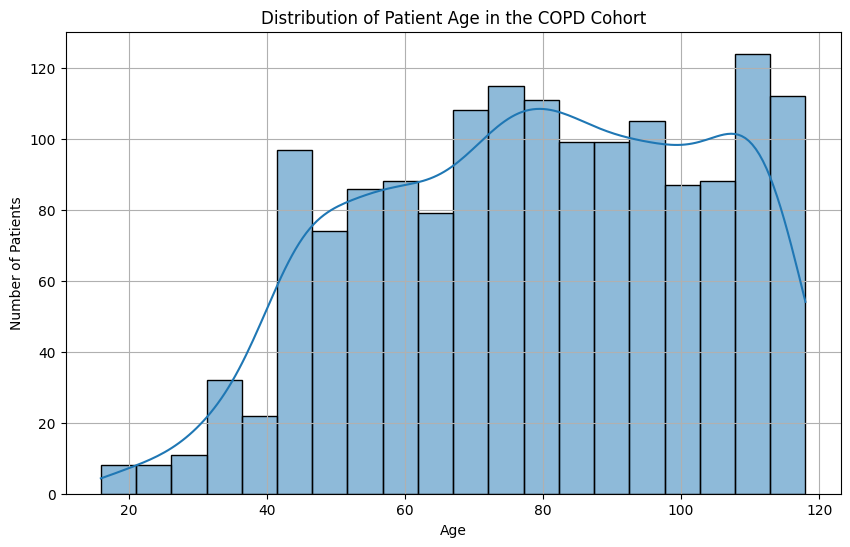

In [38]:
copd_cohort = unified_dataset[unified_dataset['COPD_Flag'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(copd_cohort['Age'], kde=True, bins=20)
plt.title('Distribution of Patient Age in the COPD Cohort')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()

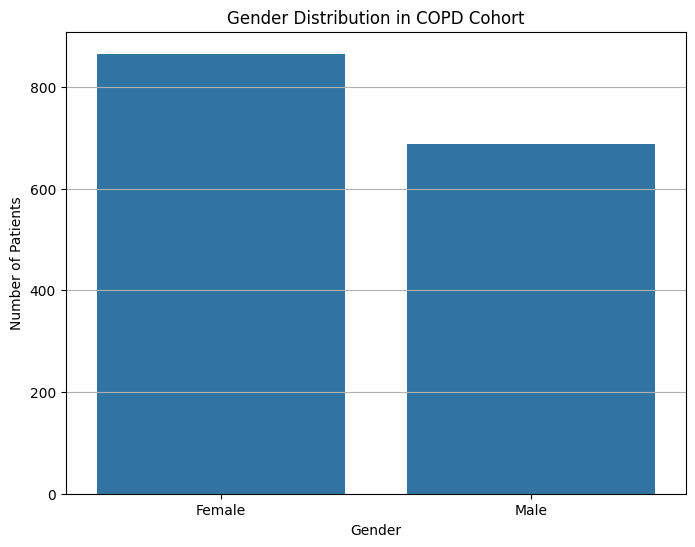

In [39]:
gender_distribution = copd_cohort['Gender'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution in COPD Cohort')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.show()

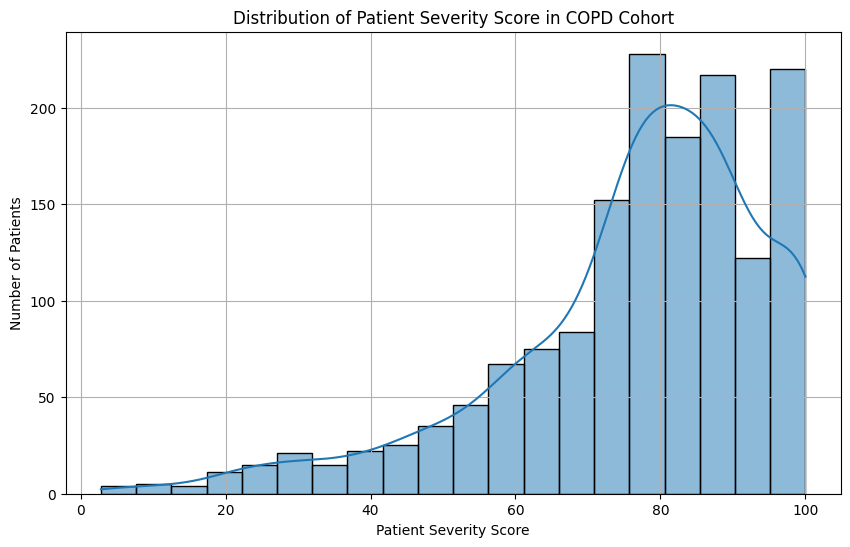

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(copd_cohort['Patient_Severity_Score'], kde=True, bins=20)
plt.title('Distribution of Patient Severity Score in COPD Cohort')
plt.xlabel('Patient Severity Score')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()

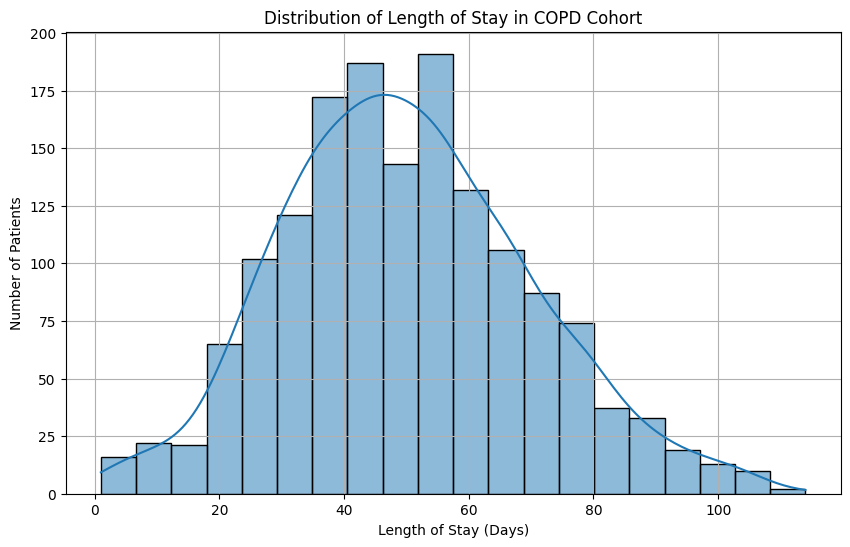

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(copd_cohort['LOS'], kde=True, bins=20)
plt.title('Distribution of Length of Stay in COPD Cohort')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()